# Malaysian COVID-19 datasets (Cases, deaths and Vaccinations)<a href="https://www.utm.my" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**COVID-19** is a novel coronavirus that emerged in late 2019 and has since caused a global pandemic that has affected millions of people and disrupted many aspects of life. As of November 6, 2023, there have been over 32 million confirmed cases and over 1.2 million deaths worldwide due to COVID-19.

However, the situation varies widely across different countries and regions, depending on their vaccination rates, testing capacities, health systems, and public health measures.

In this report, we will examine the trend of the vaccines administered and the number of cases and deaths over time in Malaysia, one of the countries that has been severely hit by the pandemic.

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. Please provide your group member name and their matrix number.

|    Name           |           Matric Number       |                      
|-------------------|-------------------------------|
|Muhammad Fikri Bin Sharunazim    | A21EC0075       |
|Muhammad Farhan Bin Ibrahim|        A21EC0072      |
|Muhammad Adam Fahmi Bin Mohd Taufiq |A21EC0061|
|Mikhail Bin Yassin |A21EC0053                      |

---
#Overview
## Malaysian COVID-19 Dataset

The **Malaysian COVID-19 dataset** provides comprehensive information related to the COVID-19 pandemic in Malaysia. It covers various aspects, including daily recorded cases, clusters, testing data, healthcare facility utilization, deaths, and vaccination statistics. Specifically, the dataset includes the following key components:

1. **Cases**: Daily recorded COVID-19 cases at both the country and state levels.
2. **Clusters**: Exhaustive list of announced clusters with relevant epidemiological data points.
3. **Tests**: Daily tests (note: not necessarily unique individuals) categorized by type at both country and state levels.
4. **Healthcare**: Information on patient flow to and from COVID-19 Quarantine and Treatment Centers (PKRC), hospitals, and ICU bed capacity and utilization.
5. **Deaths**: Daily deaths due to COVID-19 at both country and state levels.
6. **Vaccinations**: Daily and cumulative vaccination data, including dose type, brand, and coverage at country, state, district, and demographic levels.

## Data Source

The dataset is sourced from the **Ministry of Health Malaysia (MoH-Malaysia)**. It is maintained and updated by various entities, including CPRC, CPRC Hospital System, MKAK, and MySejahtera.


## Purpose and Goals

The primary objective of analyzing this dataset is to gain insights into the COVID-19 situation in Malaysia.

## Tools and Techniques

To explore the dataset, you can use the following tools and techniques:

- **Python Libraries**: Pandas, NumPy, and Matplotlib/Seaborn for data manipulation, exploration, and visualization.
- **Jupyter Notebooks & Google Colab**: To document analyses, visualize data, and share insights.
- **Github**: For documentation purposes.

---


##Data Dictionary
### Cases

- `date`: yyyy-mm-dd format; data correct as of 1200hrs on that date

- `state`: name of state (present in state file, but not country file)

- `cases_new`: cases reported in the 24h since the last report

- `cases_import`: imported cases reported in the 24h since the last report

- `cases_active`: Covid+ individuals who have not recovered or died

-  `cases_recovered` recovered cases reported in the 24h since the last report

- `cases_cluster`: number of cases attributable to clusters; the difference
between `cases_new` and the sum of cases attributable to clusters is the number of sporadic cases

### Death
- `date`: yyyy-mm-dd format; data correct as of 1200hrs on that date

- `state`: name of state (present in state file, but not country file)

- `deaths_new`: deaths due to COVID-19 based on **date reported to public**

- `deaths_bid`: deaths due to COVID-19 which were brought-in dead based on **date reported to public** (perfect subset of `deaths_new`)

- `deaths_new_dod`: deaths due to COVID-19 based on **date of death**

- `deaths_bid_dod`: deaths due to COVID-19 which were brought-in dead based on **date of death** (perfect subset of `deaths_new_dod`)

- `deaths_pvax`: number of partially-vaccinated individuals who died due to COVID-19 based on **date of death** (perfect subset of `deaths_new_dod`), where "partially vaccinated" is defined as receiving at least 1 dose of a 2-dose vaccine at least 1 day prior to testing positive, or receiving the Cansino vaccine between 1-27 days before testing positive.

- `deaths_fvax`: number of fully-vaccinated who died due to COVID-19 based on **date of death** (perfect subset of `deaths_new_dod`), where "fully vaccinated" is defined as receiving the 2nd dose of a 2-dose vaccine at least 14 days prior to testing positive, or receiving the Cansino vaccine at least 28 days before testing positive.

- `deaths_tat`: median days between date of death and date of report for all deaths reported on the day

## Vaccination
- `date`: yyyy-mm-dd format; data correct as of 2359hrs on that date

- `daily_partial` : number of individuals who received the first dose of a two-dose protocol

- `daily_partial_adol`: subset (already included) of daily_partial, but for individuals aged 12-17 only

- `aily_partial_child`: subset (already included) of daily_partial, but for individuals aged 5-11 only

- `daily_full`: number of individuals who completed their original protocol (whether the 2nd dose of a two-dose protocol, or a single-dose protocol)

- `daily_full_adol`: subset (already included) of daily_full, but for individuals aged 12-17 only

- `daily_full_child`: subset (already included) of daily_full, but for individuals aged 5-11 only

- `daily_booster`: number of individuals who received one dose beyond the original protocol

- `daily`: total doses administered

- `cumul_x`: cumulative doses falling into category x, where x is one of the daily categories

- `brandX`: denotes the number of 1st, 2nd, or 3rd doses administered for that

- `brand`; note that cansino2 is omitted as it is a single-dose protocol

- `pendingX`: number of records with an indeterminate brand, usually due to errors synchronising with the Vaccine Management System (VMS) blockchain


## Preparing the Dataset

All of the sets are available in the Official Minister of Health Malaysia (MoH-Malaysia) Github page.

###Links to Datasets
Cases by State: https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv  
Death by State: https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv  
Vaccination by State: https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/vax_state.csv

Let's begin by reading the dataset from Github, and assign the datasets to a variable each.

In [ ]:
cases = pd.read_csv(' https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/cases_state.csv') #Cases
death = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/epidemic/deaths_state.csv') #Death
vax = pd.read_csv('https://raw.githubusercontent.com/MoH-Malaysia/covid19-public/main/vaccination/vax_state.csv')   #Vaccination

## Data Preparation and Cleaning

Before using the dataset for any analysis or application, it is necessary to perform some data preparation and cleaning steps to ensure that the data is accurate, complete, consistent, and relevant. Data preparation and cleaning steps involve transforming the raw data into a suitable format for further processing and analysis. Some of the common data preparation and cleaning steps we going to cover are:

- Loading the data into a data frame: A data frame is a tabular structure that stores data in rows and columns. It allows us to manipulate and access the data easily using various methods and functions.

- Handling missing values: Missing values are those values that are not available or null in the data. They can affect the quality and reliability of the analysis if not handled properly.

- Merging datasets: Merging datasets the three datasets;  **cases_state.csv, deaths_state.csv and vax_state.csv**.

-  Explore the number of rows & columns, ranges of values etc.

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline

In [ ]:
cases

,date,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,...,cases_0_4,cases_5_11,cases_12_17,cases_18_29,cases_30_39,cases_40_49,cases_50_59,cases_60_69,cases_70_79,cases_80
0,2020-01-25,Johor,4,4,0,4,0,4,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2020-01-25,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-25,Kelantan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-25,Melaka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-25,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22075,2023-11-04,Selangor,89,0,256,1074,0,10,1,10,...,2,1,4,18,27,14,9,5,3,6
22076,2023-11-04,Terengganu,0,0,0,337,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22077,2023-11-04,W.P. Kuala Lumpur,53,0,153,1385,0,2,0,3,...,0,1,0,14,18,8,4,3,3,2
22078,2023-11-04,W.P. Labuan,1,0,4,37,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
death

,date,state,deaths_new,deaths_bid,deaths_new_dod,deaths_bid_dod,deaths_unvax,deaths_pvax,deaths_fvax,deaths_boost,deaths_tat
0,2020-03-17,Johor,1,0,1,0,1,0,0,0,0
1,2020-03-17,Kedah,0,0,0,0,0,0,0,0,0
2,2020-03-17,Kelantan,0,0,0,0,0,0,0,0,0
3,2020-03-17,Melaka,0,0,0,0,0,0,0,0,0
4,2020-03-17,Negeri Sembilan,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
21243,2023-11-04,Selangor,0,0,0,0,0,0,0,0,0
21244,2023-11-04,Terengganu,0,0,0,0,0,0,0,0,0
21245,2023-11-04,W.P. Kuala Lumpur,0,0,0,0,0,0,0,0,0
21246,2023-11-04,W.P. Labuan,0,0,0,0,0,0,0,0,0


In [ ]:
vax

,date,state,daily_partial,daily_full,daily_booster,daily_booster2,daily,daily_partial_adol,daily_full_adol,daily_booster_adol,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
0,2021-02-24,Johor,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-24,Kedah,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-24,Kelantan,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-24,Melaka,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-24,Negeri Sembilan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15835,2023-11-10,Selangor,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15836,2023-11-10,Terengganu,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15837,2023-11-10,W.P. Kuala Lumpur,0,0,4,4,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15838,2023-11-10,W.P. Labuan,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Merging the three datasets using **Inner Join**

In [ ]:
df = cases.merge(death,on=['date','state']).merge(vax,on=['date','state'])
df_row, df_cols = df.shape

In [ ]:
print(f'Total Columns: {df_cols}')

Total Columns: 83


Setting up the **Index** of the column "Date"

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df

,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
date,,,,,,,,,,,,,,,,,,,,,
2021-02-24,Johor,318,0,518,6165,189,318,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,Kedah,17,0,187,579,4,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,Kelantan,53,0,100,698,26,53,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,Melaka,26,0,37,365,21,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,Negeri Sembilan,1392,0,119,2210,1358,1392,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-04,Selangor,89,0,256,1074,0,10,1,10,68,...,0,0,0,0,0,0,0,0,0,0
2023-11-04,Terengganu,0,0,0,337,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-11-04,W.P. Kuala Lumpur,53,0,153,1385,0,2,0,3,48,...,0,0,0,0,0,0,0,0,0,0


Checking if there are any NaN of Null values in the combined dataset, using isna().

In [ ]:
pd.options.display.max_rows = 83    #setting up 83 columns to be display (not truncated output)
df.isna().sum() #checking the sum of any NaN / Null Values of column

state                   0
cases_new               0
cases_import            0
cases_recovered         0
cases_active            0
cases_cluster           0
cases_unvax             0
cases_pvax              0
cases_fvax              0
cases_boost             0
cases_child             0
cases_adolescent        0
cases_adult             0
cases_elderly           0
cases_0_4               0
cases_5_11              0
cases_12_17             0
cases_18_29             0
cases_30_39             0
cases_40_49             0
cases_50_59             0
cases_60_69             0
cases_70_79             0
cases_80                0
deaths_new              0
deaths_bid              0
deaths_new_dod          0
deaths_bid_dod          0
deaths_unvax            0
deaths_pvax             0
deaths_fvax             0
deaths_boost            0
deaths_tat              0
daily_partial           0
daily_full              0
daily_booster           0
daily_booster2          0
daily                   0
daily_partia

## Exploratory Analysis and Visualization

---

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

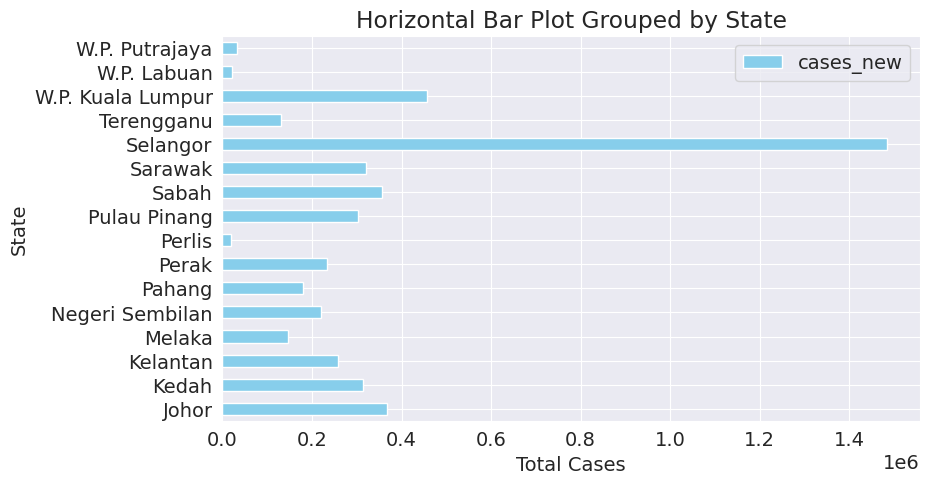

In [ ]:
grouped_df = df.groupby('state')['cases_new'].sum().reset_index()

# Create a horizontal bar plot using grouped_df
grouped_df.plot(kind='barh', x='state', y='cases_new', color='skyblue')

# Set labels and title
plt.xlabel('Total Cases')
plt.ylabel('State')
plt.title('Horizontal Bar Plot Grouped by State')
# Show the plot
plt.show()

In [ ]:
grouped_df

,state,cases_new
0,Johor,366556
1,Kedah,314688
2,Kelantan,258785
3,Melaka,146003
4,Negeri Sembilan,220226
5,Pahang,180956
6,Perak,233770
7,Perlis,19349
8,Pulau Pinang,301932
9,Sabah,355924


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15744 entries, 2021-02-24 to 2023-11-04
Data columns (total 82 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 15744 non-null  object
 1   cases_new             15744 non-null  int64 
 2   cases_import          15744 non-null  int64 
 3   cases_recovered       15744 non-null  int64 
 4   cases_active          15744 non-null  int64 
 5   cases_cluster         15744 non-null  int64 
 6   cases_unvax           15744 non-null  int64 
 7   cases_pvax            15744 non-null  int64 
 8   cases_fvax            15744 non-null  int64 
 9   cases_boost           15744 non-null  int64 
 10  cases_child           15744 non-null  int64 
 11  cases_adolescent      15744 non-null  int64 
 12  cases_adult           15744 non-null  int64 
 13  cases_elderly         15744 non-null  int64 
 14  cases_0_4             15744 non-null  int64 
 15  cases_5_11            15744

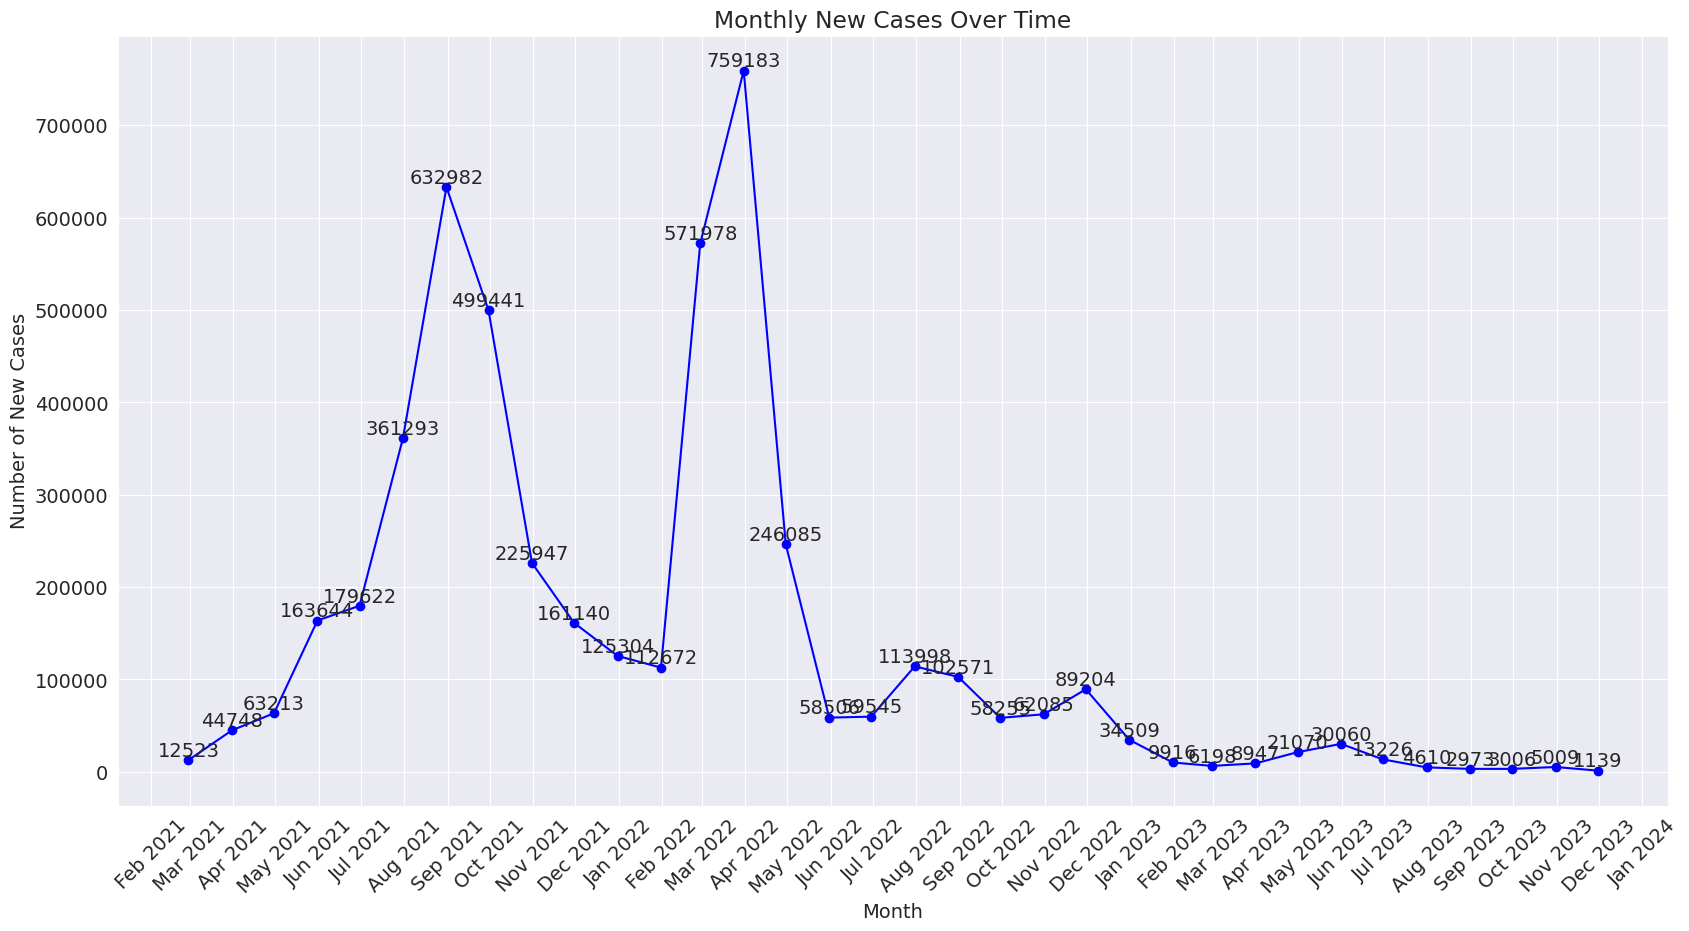

In [ ]:
# Convert the index to datetime
df.index = pd.to_datetime(df.index.get_level_values(0))

# Filter data for the 'cases_new' column
cases_new_data = df['cases_new']

# Group by month and sum the values
monthly_cases = cases_new_data.resample('M').sum()

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(monthly_cases.index, monthly_cases.values, marker='o', linestyle='-', color='b')

# Set x-axis ticks to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Add text labels on each data point
for i, value in enumerate(monthly_cases.values):
    plt.text(monthly_cases.index[i], value, str(value), ha='center', va='bottom')

plt.title('Monthly New Cases Over Time')
plt.xlabel('Month')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45)  #Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()

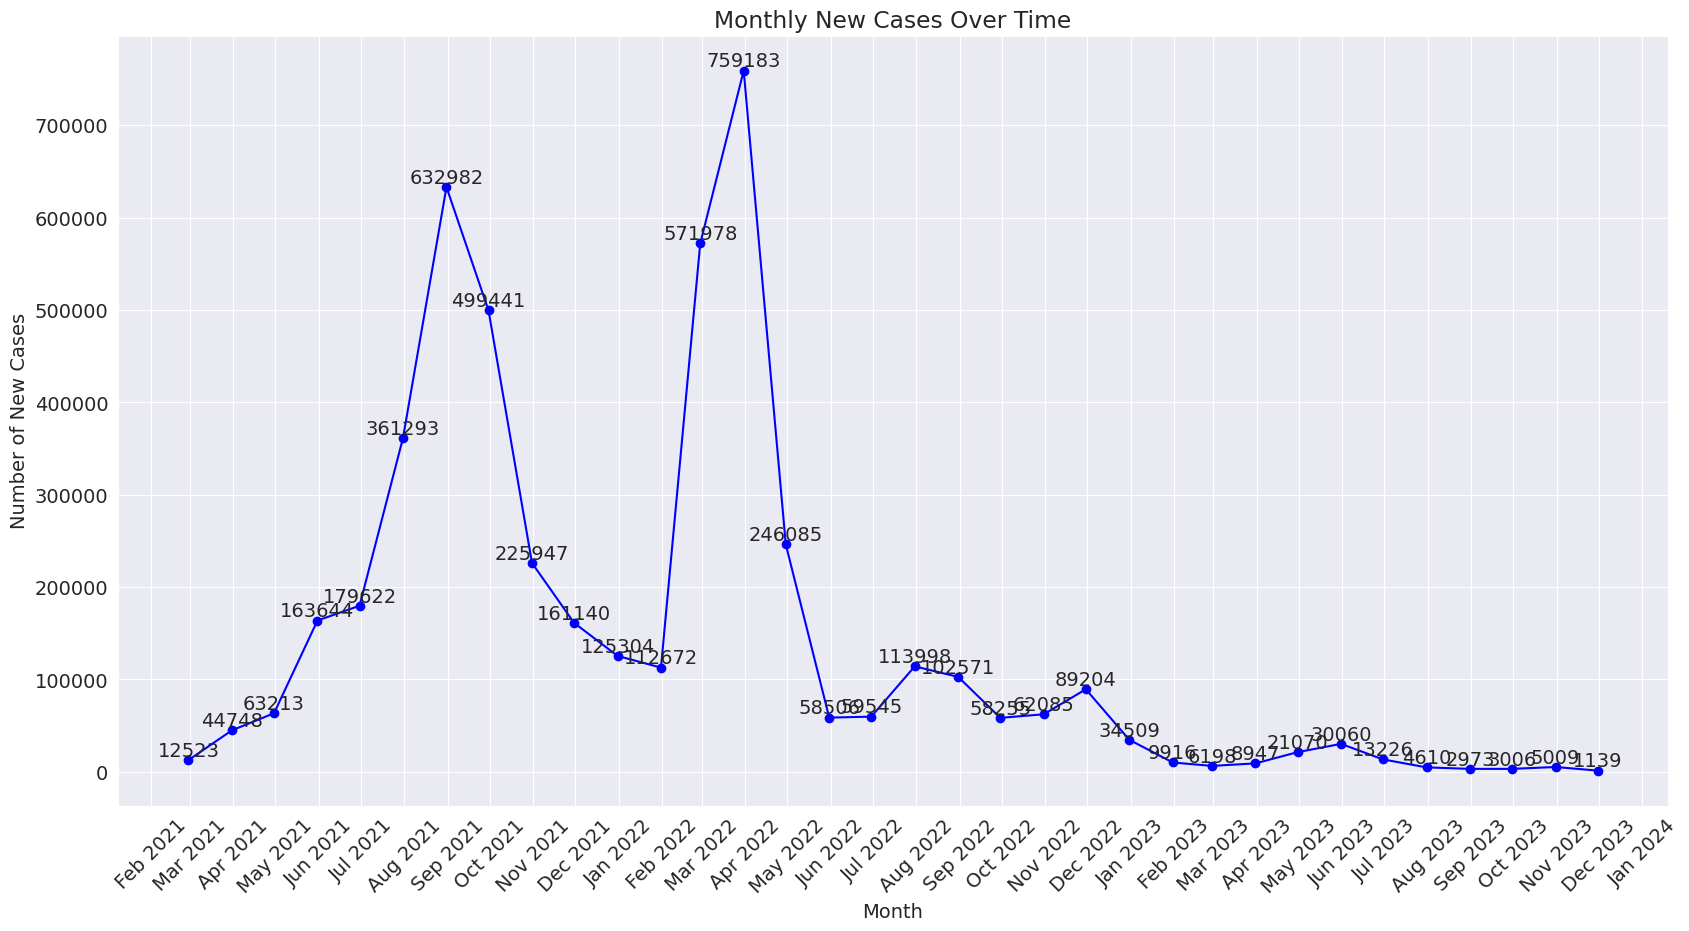

In [ ]:
# Convert the index to datetime if it is not already
df.index = pd.to_datetime(df.index.get_level_values(0))

# Filter data for the 'cases_new' column
cases_new_data = df['cases_new']

# Group by month and sum the values
monthly_cases = cases_new_data.resample('M').sum()

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(monthly_cases.index, monthly_cases.values, marker='o', linestyle='-', color='b')

# Set x-axis ticks to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Add text labels on each data point
for i, value in enumerate(monthly_cases.values):
    plt.text(monthly_cases.index[i], value, str(value), ha='center', va='bottom')

plt.title('Monthly New Cases Over Time')
plt.xlabel('Month')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45)  #Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


>The graph shows the number of monthly new cases over time. The x-axis represents month and the y-axis represents number of new cases. Based on the graph above, we can see that the number of monthly Covid-19 cases in 2021 is incline from February 2021 to September 2021. From September 2021, the trend declined until February 2022. However, there has been a sharp rise in February 2022 until April 2022. Then, the trend declined until November 2023. The highest number of monthly cases is in April 2022 with 759183 records.  

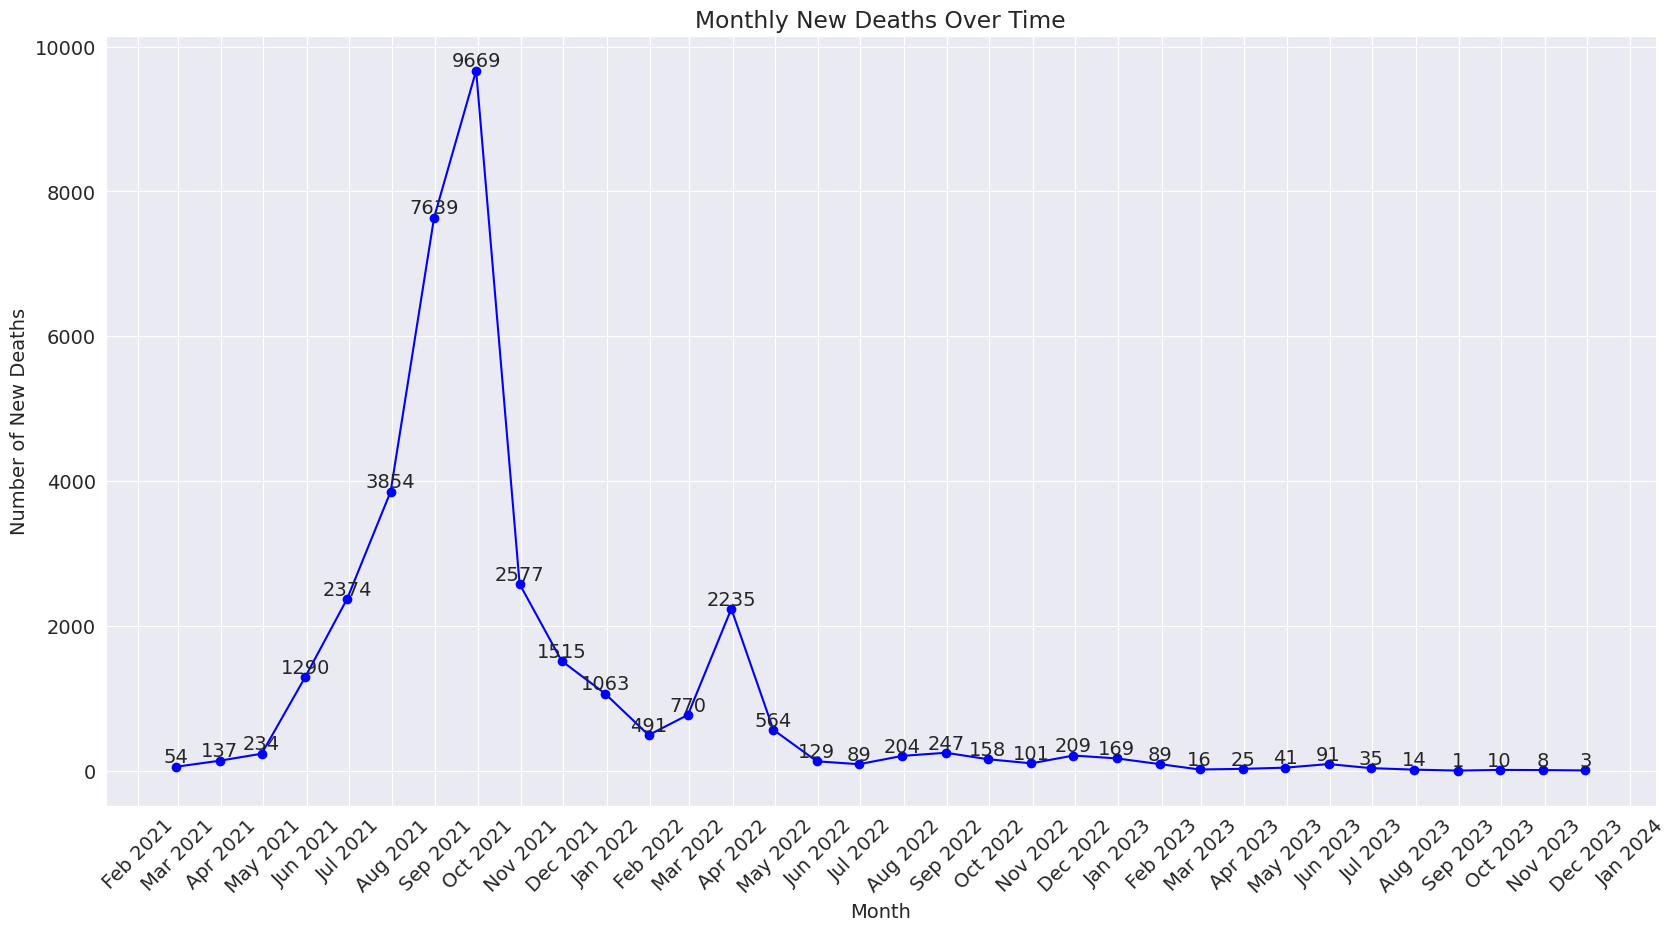

In [ ]:
# Convert the index to datetime if it is not already
df.index = pd.to_datetime(df.index.get_level_values(0))

# Filter data for the 'deaths_new' column
deaths_new_data = df['deaths_new']

# Group by month and sum the values
monthly_deaths = deaths_new_data.resample('M').sum()

# Plotting
plt.figure(figsize=(20, 10))
plt.plot(monthly_deaths.index, monthly_deaths.values, marker='o', linestyle='-', color='b')

# Set x-axis ticks to show every month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Add text labels on each data point
for i, value in enumerate(monthly_deaths.values):
    plt.text(monthly_deaths.index[i], value, str(value), ha='center', va='bottom')

plt.title('Monthly New Deaths Over Time')
plt.xlabel('Month')
plt.ylabel('Number of New Deaths')
plt.xticks(rotation=45)  #Rotate x-axis labels for better visibility
plt.grid(True)
plt.show()


>The graph shows the number of monthly new deaths over time. The x-axis represents month and the y-axis represents number of new deaths. Based on the graph above, we can see that the number of monthly Covid-19 deaths in 2021 is incline from February 2021 to October 2021. From October 2021, the trend declined until November 2023. The highest number of monthly deaths is in October 2021 with 9669 records.

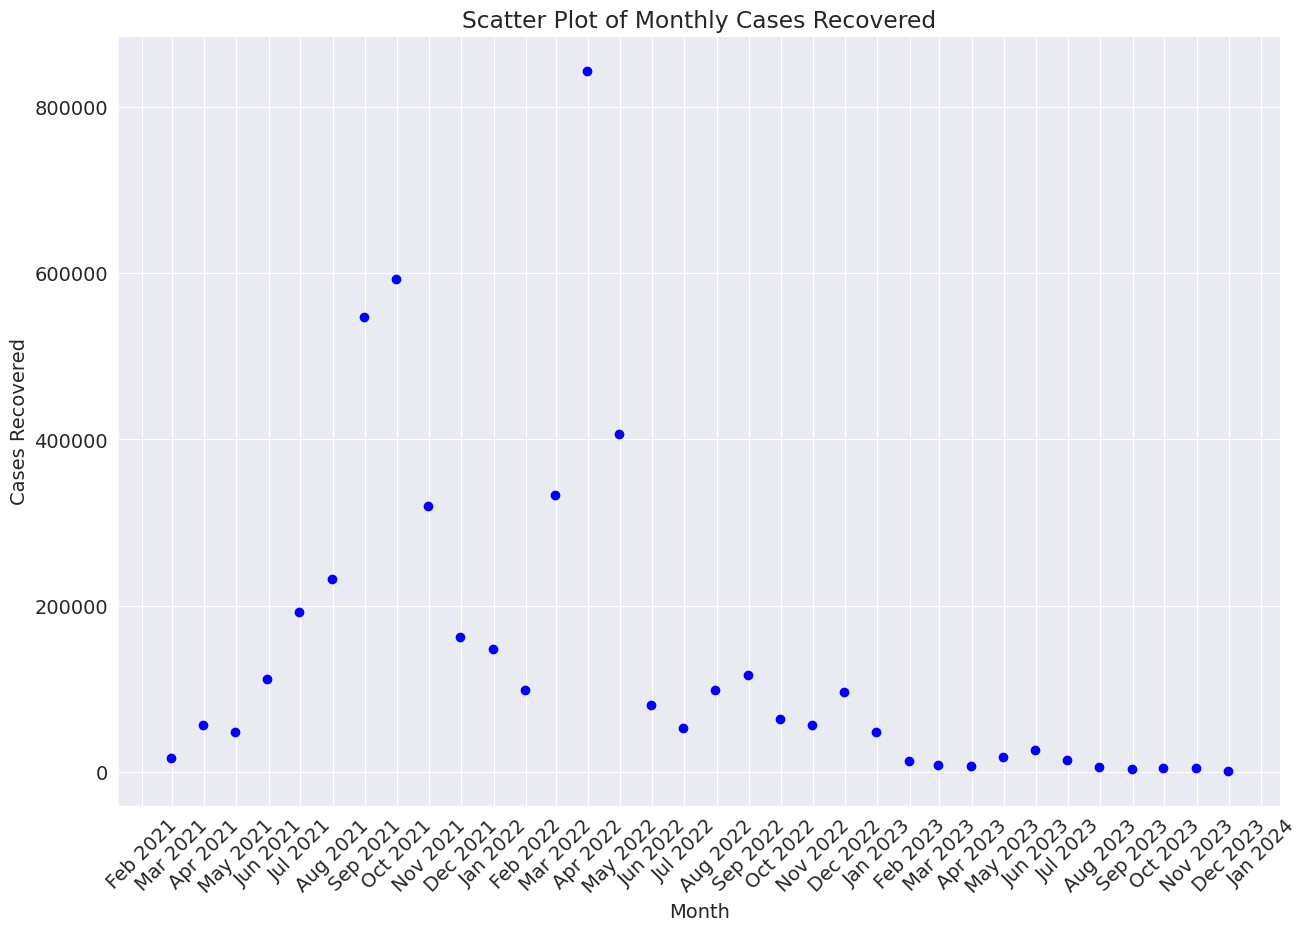

In [ ]:
df.index = pd.to_datetime(df.index.get_level_values(0))
cases_recovered_data = df['cases_recovered']
monthly_cases_recovered = cases_recovered_data.resample('M').sum()

plt.figure(figsize=(15, 10))
plt.scatter(monthly_cases_recovered.index, monthly_cases_recovered.values, color='b')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xlabel('Month')
plt.ylabel('Cases Recovered')
plt.title('Scatter Plot of Monthly Cases Recovered')
plt.xticks(rotation=45)
plt.show()

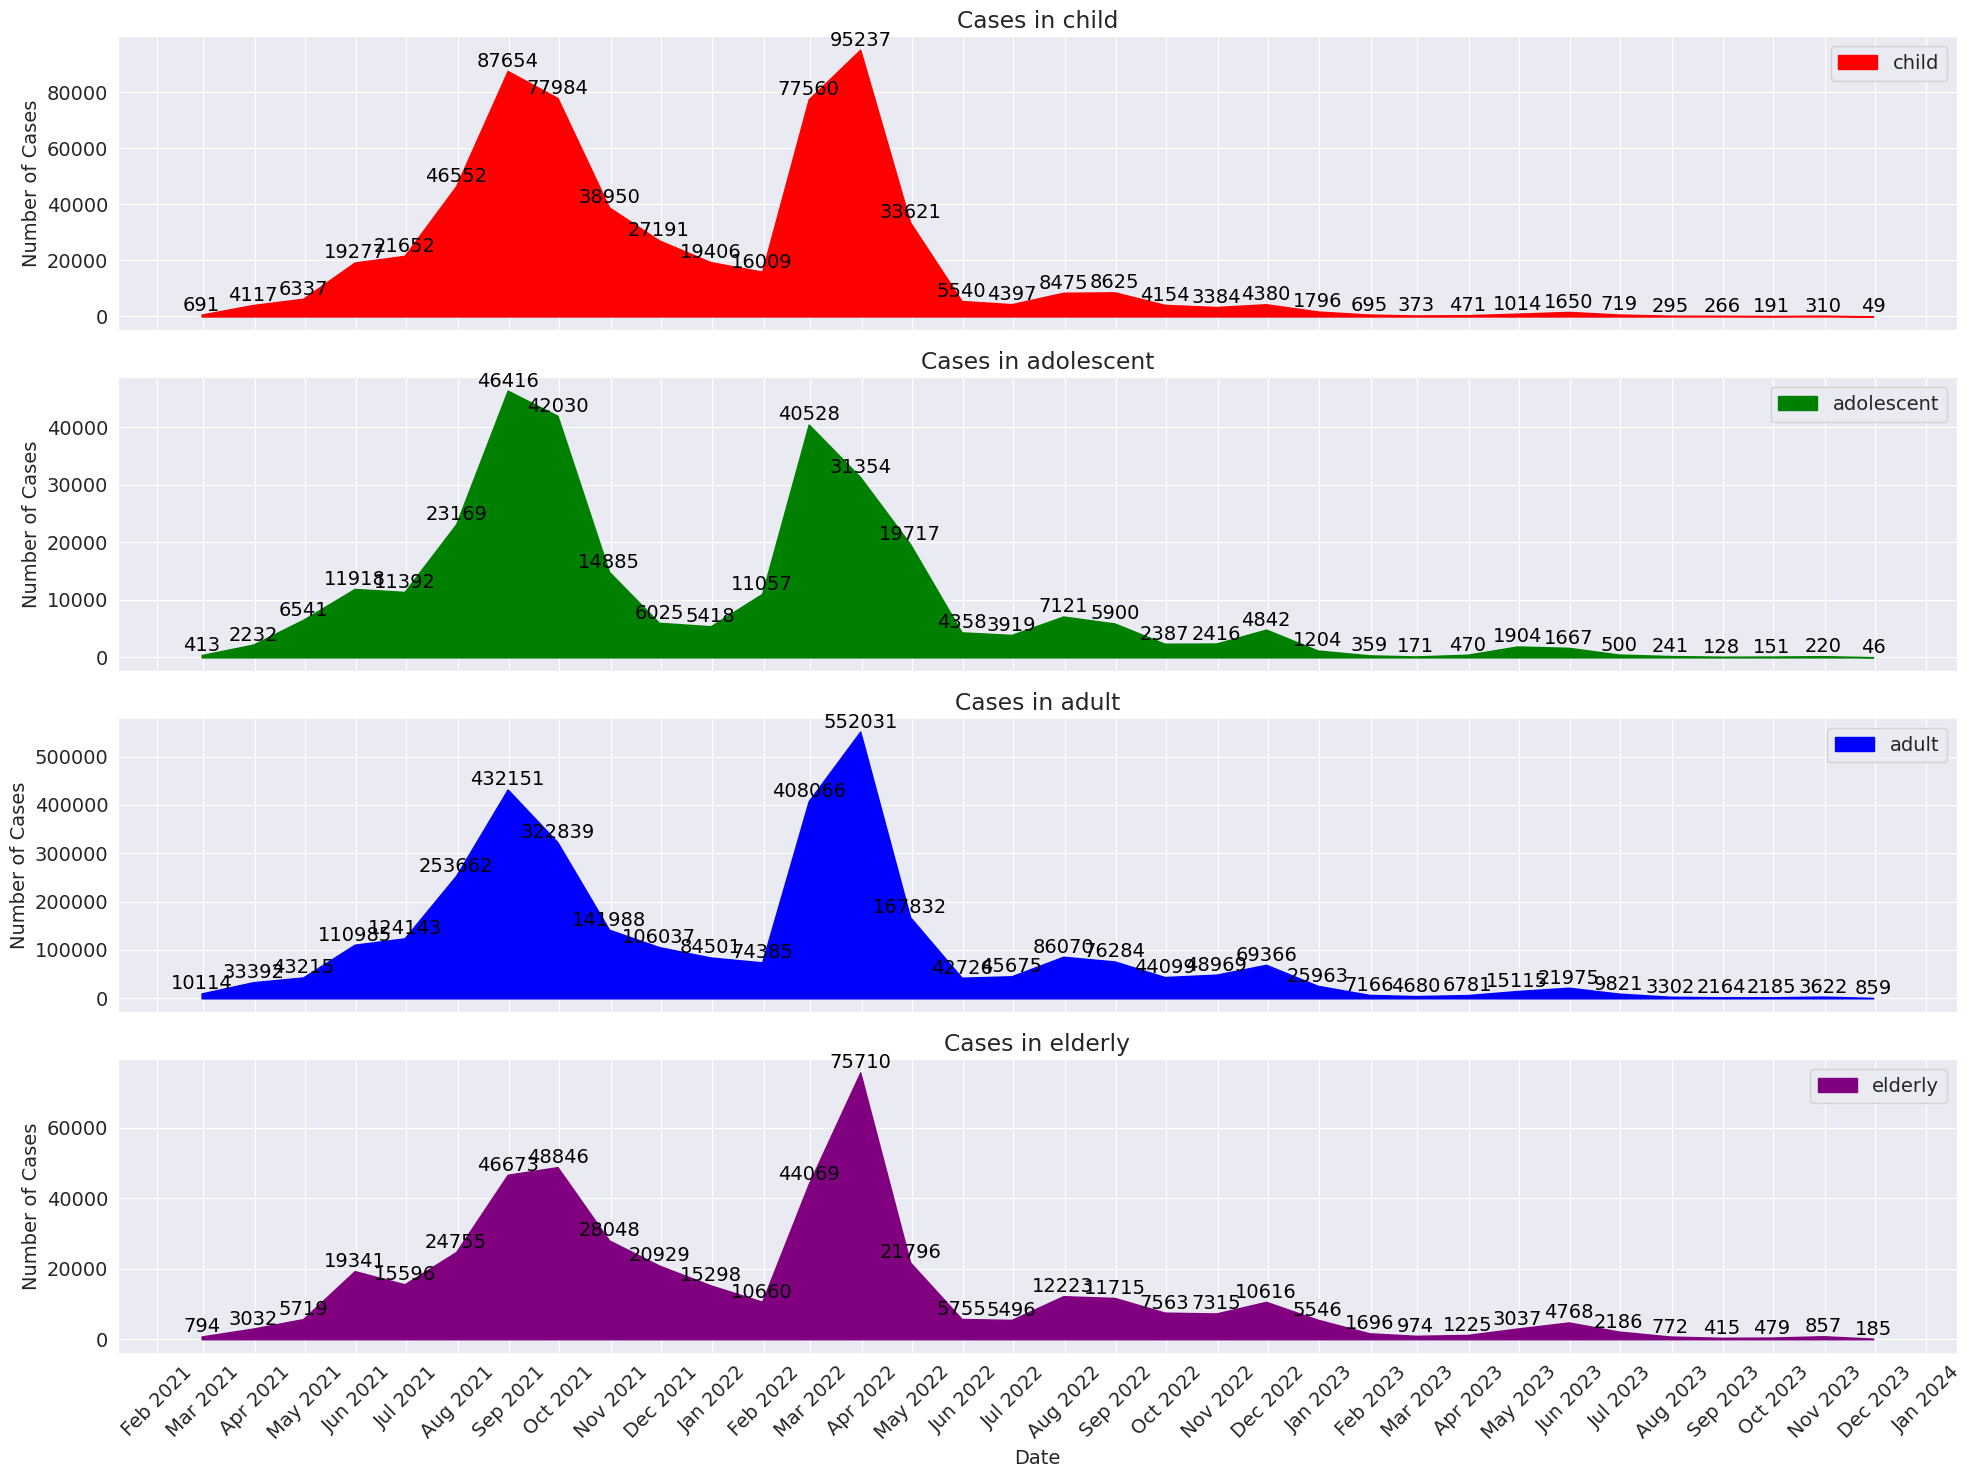

In [ ]:
df.index = pd.to_datetime(df.index.get_level_values(0))
age_group_cols = ['cases_child', 'cases_adolescent', 'cases_adult', 'cases_elderly']
colors = ['red', 'green', 'blue', 'purple']  # Specify colors for each age group
monthly_cases_age_groups = df[age_group_cols].resample('M').sum()

fig, axes = plt.subplots(nrows=len(age_group_cols), figsize=(20, 15), sharex=True)

for ax, col, color in zip(axes, age_group_cols, colors):
    ax.fill_between(monthly_cases_age_groups.index, monthly_cases_age_groups[col], label=col.split('_')[1], color=color)
    ax.set_title(f'Cases in {col.split("_")[1]}')
    ax.set_ylabel('Number of Cases')
    ax.legend()

    # Adding text labels
    for date, value in zip(monthly_cases_age_groups.index, monthly_cases_age_groups[col]):
        ax.text(date, value, f'{value:.0f}', ha='center', va='bottom', color='black')

plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()

In [ ]:
df

,state,cases_new,cases_import,cases_recovered,cases_active,cases_cluster,cases_unvax,cases_pvax,cases_fvax,cases_boost,...,sinopharm2,sinopharm3,sinopharm4,cansino,cansino3,cansino4,pending1,pending2,pending3,pending4
date,,,,,,,,,,,,,,,,,,,,,
2021-02-24,Johor,318,0,518,6165,189,318,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,Kedah,17,0,187,579,4,17,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,Kelantan,53,0,100,698,26,53,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,Melaka,26,0,37,365,21,26,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-24,Negeri Sembilan,1392,0,119,2210,1358,1392,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-04,Selangor,89,0,256,1074,0,10,1,10,68,...,0,0,0,0,0,0,0,0,0,0
2023-11-04,Terengganu,0,0,0,337,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2023-11-04,W.P. Kuala Lumpur,53,0,153,1385,0,2,0,3,48,...,0,0,0,0,0,0,0,0,0,0


## Asking and Answering Questions

The following questions are asked to gives us a better insight on what should our team focused for this project.



#### Q1: What is the overall trend of COVID-19 cases and deaths over time in Malaysia?

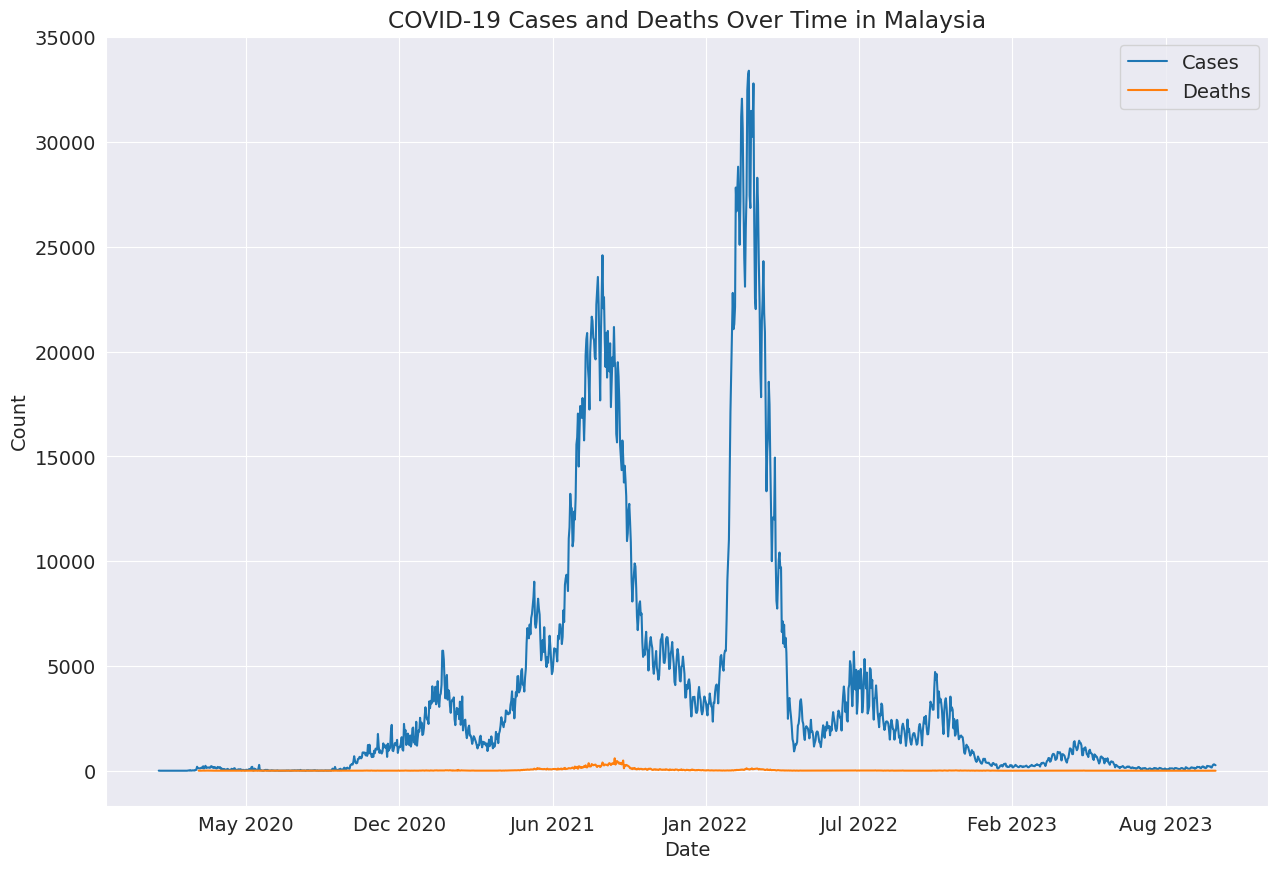

In [ ]:

# Convert 'date' column to datetime format
cases['date'] = pd.to_datetime(cases['date'])
death['date'] = pd.to_datetime(death['date'])

# Group by date and sum the cases and deaths
cases_over_time = cases.groupby('date')['cases_new'].sum()
deaths_over_time = death.groupby('date')['deaths_new'].sum()

# Plotting
plt.figure(figsize=(15, 10))
plt.plot(cases_over_time.index, cases_over_time, label='Cases')
plt.plot(deaths_over_time.index, deaths_over_time, label='Deaths')
plt.title('COVID-19 Cases and Deaths Over Time in Malaysia')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()

# Format x-axis ticks to show only months
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))

plt.show()

In [ ]:
print(f'Total Covid19 Cases: {cases_over_time.sum()}')
print(f'Total Covid19 Deaths: {deaths_over_time.sum()}')

Total Covid19 Cases: 5132831
Total Covid19 Deaths: 37186


In [ ]:
print(f'Total Cases over Death {round(((deaths_over_time.sum()/cases_over_time.sum())* 100),2)}% ')

Total Cases over Death 0.72% 


In [ ]:
cases_by_month = cases.groupby([pd.to_datetime(cases.date).dt.year, cases.date.dt.month]).sum()

cases_by_month

<ipython-input-143-244b9f0e5efe>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cases_by_month = cases.groupby([pd.to_datetime(cases.date).dt.year, cases.date.dt.month]).sum()


cases_new  cases_import  cases_recovered  cases_active  \
date date                                                           
2020 1             8             8                0            39   
     2            17            15               22           256   
     3          2741           276              514         23626   
     4          3236           512             3634         66282   
     5          1817           236             2182         43896   
     6           820           143             2001         23866   
     7           337           142              290          3672   
     8           364           174              410          5802   
     9          1884           144              913         17356   
     10        20324            96            11281        191717   
     11        34149           151            33511        355532   
     12        47313           176            34182        471913   
2021 1        101949           202            77108       1072500   
     2         85793           127           107368       1182685   
     3         44748           235            56207        532340   
     4         63213           388            48356        572595   
     5        163644           193           112058       1494784   
     6        179622           282           192642       2147226   
     7        361293           546           231958       3635623   
     8        632982           490           547086       7538701   
     9        499441           326           593100       6642026   
     10       225947           473           319938       3160787   
     11       161140           568           162443       1988769   
     12       125304          2398           148168       1675713   
2022 1        112672         10193            98625       1333652   
     2        571978          4104           332561       4934787   
     3        759183         12442           843516       8655724   
     4        246085          1962           406869       3501144   
     5         58506           138            80731        850844   
     6         59545           621            53174        745335   
     7        113998           160            97922       1247384   
     8        102571           160           116640       1263893   
     9         58255           129            63319        795905   
     10        62085           149            56318        783290   
     11        89204            87            95471        904360   
     12        34509            89            47298        537614   
2023 1          9916            81            12934        309765   
     2          6198            69             8166        208941   
     3          8947            76             7492        219041   
     4         21070            42            17330        327065   
     5         30060            66            25767        523162   
     6         13226            22            14321        510691   
     7          4610             8             6200        431355   
     8          2973            12             3860        396723   
     9          3006            26             4324        342651   
     10         5009            17             4395        359230   
     11         1139             3             1456         47756   

           cases_cluster  cases_unvax  cases_pvax  cases_fvax  cases_boost  \
date date                                                                    
2020 1                 0            8           0           0            0   
     2                 0           17           0           0            0   
     3              1898         2741           0           0            0   
     4              1666         3236           0           0            0   
     5               427         1817           0           0            0   
     6                43          820           0           0            0   
     

#### Q2: Which state has the highest total number of cases, and how does it compare to the state with the lowest total cases?

In [ ]:
grouped_df.sort_values(['cases_new'], ascending=False)

,state,cases_new
11,Selangor,1483309
13,W.P. Kuala Lumpur,456807
0,Johor,366556
9,Sabah,355924
10,Sarawak,319865
1,Kedah,314688
8,Pulau Pinang,301932
2,Kelantan,258785
6,Perak,233770
4,Negeri Sembilan,220226


In [ ]:
state_with_highest_cases = df.groupby('state')['cases_new'].sum().idxmax()
state_with_lowest_cases = df.groupby('state')['cases_new'].sum().idxmin()
print(f"State with the highest cases: {state_with_highest_cases}")
print(f"State with the lowest cases: {state_with_lowest_cases}")


State with the highest cases: Selangor
State with the lowest cases: Perlis


#### Q3: What is the correlation between the total number of cases and the total number of vaccinations?


In [ ]:
# Calculate the daily vaccination rate (full doses) per 100,000 population
df['vax_rate'] = (df['daily_full'] / df['cumul_full']) * 100000

# Calculate the correlation between vaccination rate and new cases
correlation = df['vax_rate'].corr(df['cases_new'])

print(f"The correlation between vaccination rate and new cases is: {correlation:.2f}")

The correlation between vaccination rate and new cases is: 0.01


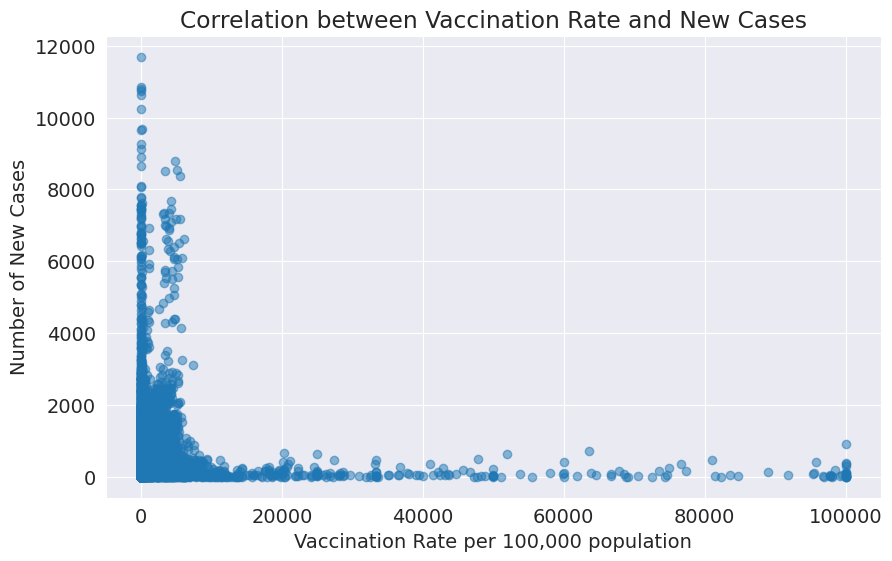

In [ ]:
#Visualization Correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['vax_rate'], df['cases_new'], alpha=0.5)
plt.title('Correlation between Vaccination Rate and New Cases')
plt.xlabel('Vaccination Rate per 100,000 population')
plt.ylabel('Number of New Cases')
plt.show()

In [ ]:
print('Total vaccine administered:', df['daily'].sum())

Total vaccine administered: 72653741


#### Q4: Which vaccine has the highest number of doses administered?

In [ ]:
# Create a new DataFrame for vaccine doses
vaccine_df = df[['pfizer1', 'pfizer2', 'pfizer3', 'pfizer4', 'sinovac1', 'sinovac2', 'sinovac3', 'sinovac4',
                 'astra1', 'astra2', 'astra3', 'astra4', 'sinopharm1', 'sinopharm2', 'sinopharm3', 'sinopharm4',
                 'cansino', 'cansino3', 'cansino4']]

# Calculate the total doses for each vaccine
total_doses = vaccine_df.sum()

# Identify the vaccine with the highest number of doses
most_administered_vaccine = total_doses.idxmax()
total_doses_most_administered = total_doses.max()

print(f"The vaccine with the highest number of doses administered is {most_administered_vaccine} with {total_doses_most_administered} doses.")

The vaccine with the highest number of doses administered is pfizer1 with 15640087 doses.


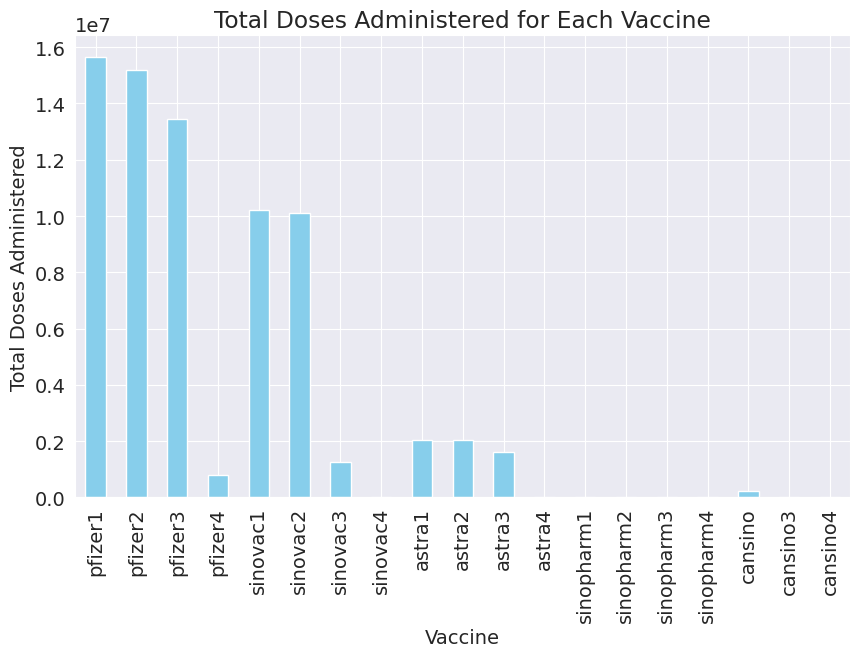

In [ ]:
# Visualization of the total doses Administered for Each Vaccine
plt.figure(figsize=(10, 6))
total_doses.plot(kind='bar', color='skyblue')
plt.title('Total Doses Administered for Each Vaccine')
plt.xlabel('Vaccine')
plt.ylabel('Total Doses Administered')
plt.show()

In [ ]:
highest_vax_brand = df['pfizer1'].sum()+df['pfizer2'].sum()+df['pfizer3'].sum()+df['pfizer4'].sum()
print(f'Highest number of doses administered: Pfizer: ', highest_vax_brand)

Highest number of doses administered: Pfizer:  45069813


In [ ]:
pfizer_percentage = (highest_vax_brand / df['daily'].sum()) * 100
print(f'Pfizer Percentage: {round(pfizer_percentage,2)}%' )

Pfizer Percentage: 62.03%


#### Q5: What is the distribution of deaths by vaccination status?

<Figure size 1200x600 with 0 Axes>

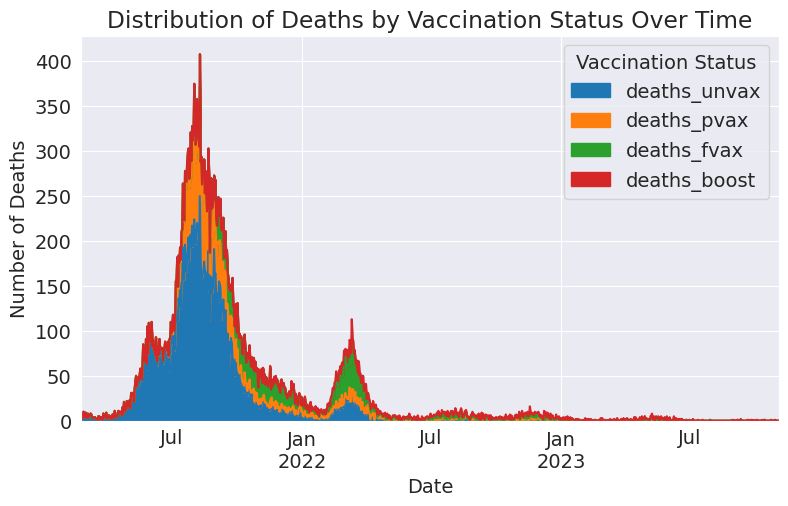

In [ ]:
# Create a new DataFrame for deaths by vaccination status
deaths_vax_df = df[['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']]

#Group by date and sum the deaths for each vaccination status
deaths_vax_totals = deaths_vax_df.groupby(df.index)[['deaths_unvax', 'deaths_pvax', 'deaths_fvax', 'deaths_boost']].sum()


# Plot the distribution of deaths by vaccination status
plt.figure(figsize=(12, 6))
deaths_vax_totals.plot.area(stacked=True)
plt.title('Distribution of Deaths by Vaccination Status Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.legend(title='Vaccination Status')
plt.show()



#### Q6: Is there a correlation between the number of cases and the number of deaths?

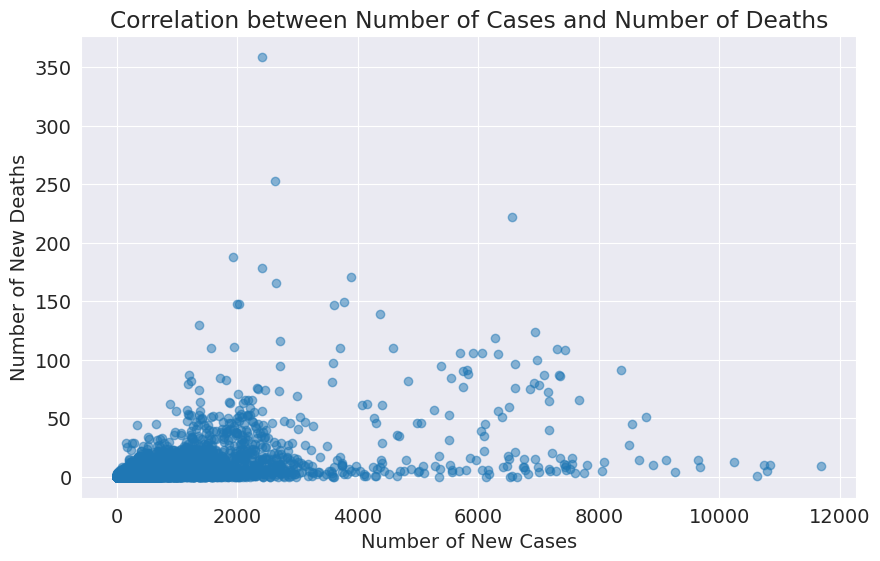

The correlation between the number of cases and deaths is: 0.52


In [ ]:
# Calculate the correlation between cases and deaths
correlation_cases_deaths = df['cases_new'].corr(df['deaths_new'])

plt.figure(figsize=(10, 6))
plt.scatter(df['cases_new'], df['deaths_new'], alpha=0.5)
plt.title('Correlation between Number of Cases and Number of Deaths')
plt.xlabel('Number of New Cases')
plt.ylabel('Number of New Deaths')
plt.show()

print(f"The correlation between the number of cases and deaths is: {correlation_cases_deaths:.2f}")


#### Q7: What is the proportion of deaths among vaccinated and unvaccinated individuals?



In [ ]:
# Create a new column for total deaths
df['deaths_total'] = df['deaths_new'] + df['deaths_bid']

# Calculate the proportion of deaths among vaccinated and unvaccinated individuals
total_deaths_unvax = df['deaths_unvax'].sum()
total_deaths_vax = df['deaths_pvax'].sum() + df['deaths_fvax'].sum() + df['deaths_boost'].sum()

proportion_unvax = total_deaths_unvax / df['deaths_total'].sum()
proportion_vax = total_deaths_vax / df['deaths_total'].sum()

print(f"Proportion of deaths among unvaccinated individuals: {proportion_unvax:.2%}")
print(f"Proportion of deaths among vaccinated individuals: {proportion_vax:.2%}")


Proportion of deaths among unvaccinated individuals: 48.67%
Proportion of deaths among vaccinated individuals: 33.51%


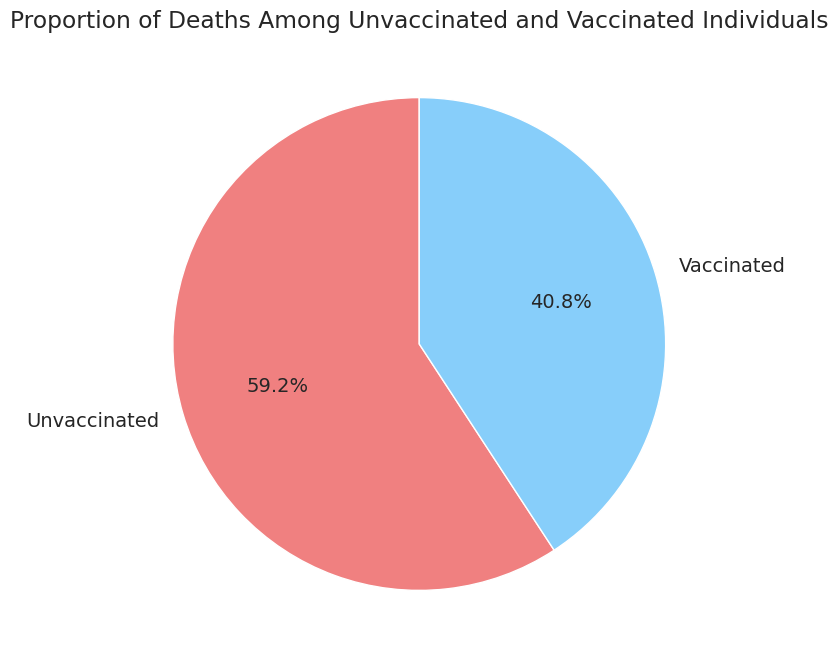

In [ ]:
# Pie chart Proportion of Deaths
labels = ['Unvaccinated', 'Vaccinated']
sizes = [total_deaths_unvax, total_deaths_vax]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Deaths Among Unvaccinated and Vaccinated Individuals')
plt.show()

#### Q8: What is the trend of the vaccines provided and the number of cases over time?



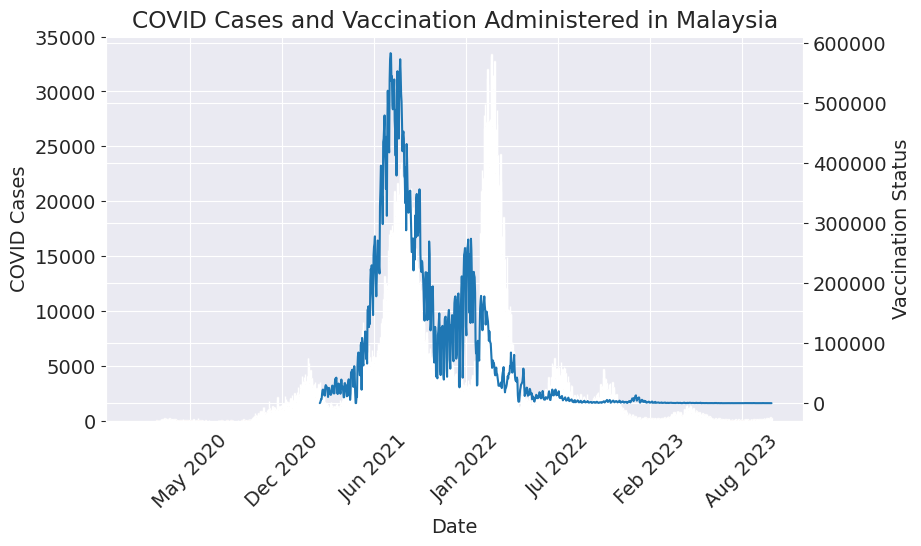

In [ ]:
x = df.index
y = cases_over_time # from Q1
y1 = df.groupby(df.index)['daily'].sum()

# Create plot
fig, ax1 = plt.subplots() # create a figure and an axes object
ax1.bar(cases_over_time.index, y, color ='maroon') # plot COVID cases on the left axis
ax1.set_xlabel('Date') # add a label for the x-axis
ax1.set_ylabel('COVID Cases') # add a label for the y-axis
plt.xticks(rotation=45)

# Create another axes object that shares the same x-axis with ax1
ax2 = ax1.twinx() # use twinx() function

# Plot vaccination status on the right axis
ax2.plot(y1)
ax2.set_ylabel('Vaccination Status')
ax2.set_xlabel('Date')


# Add labels for both axes
ax1.set_title('COVID Cases and Vaccination Administered in Malaysia')

# Show plot
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.show()

#### Q9: What is the trend of the vaccines provided and the number of severe cases or deaths over time?




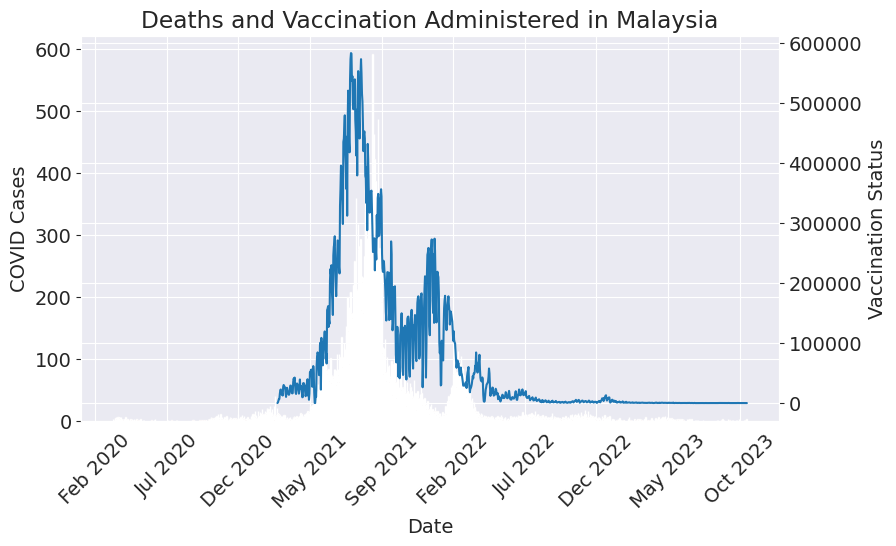

In [ ]:
x = df.index
y = deaths_over_time # from Q1
y1 = df.groupby(df.index)['daily'].sum()

# Create plot
fig, ax1 = plt.subplots() # create a figure and an axes object
ax1.bar(deaths_over_time.index, y, color ='maroon') # plot COVID cases on the left axis
ax1.set_xlabel('Date') # add a label for the x-axis
ax1.set_ylabel('COVID Cases') # add a label for the y-axis
plt.xticks(rotation=45)

# Create another axes object that shares the same x-axis with ax1
ax2 = ax1.twinx() # use twinx() function

# Plot vaccination status on the right axis
ax2.plot(y1)
ax2.set_ylabel('Vaccination Status')
ax2.set_xlabel('Date')


# Add labels for both axes
ax1.set_title('Deaths and Vaccination Administered in Malaysia')

# Show plot
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(prune='both'))
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.show()

#### Q10: What is the correlation between the  total number of vaccinations and the total number of deaths?



In [ ]:
# Calculate the daily vaccination rate (full doses) per 100,000 population
df['vax_rate'] = (df['daily_full'] / df['cumul_full']) * 100000

# Calculate the correlation between vaccination rate and new cases
correlation = df['vax_rate'].corr(df['deaths_new'])

print(f"The correlation between vaccination rate and new deaths is: {correlation:.2f}")

The correlation between vaccination rate and new deaths is: 0.03


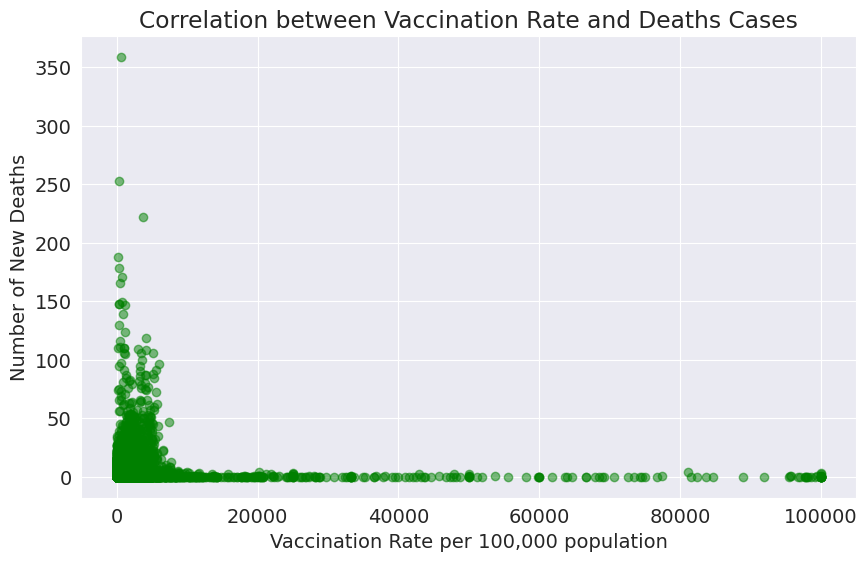

In [ ]:
#Visualization Correlation
plt.figure(figsize=(10, 6))
plt.scatter(df['vax_rate'], df['deaths_new'], color='green', alpha=0.5)
plt.title('Correlation between Vaccination Rate and Deaths Cases')
plt.xlabel('Vaccination Rate per 100,000 population')
plt.ylabel('Number of New Deaths')
plt.show()

## Inferences and Conclusion



####Q1: What is the overall trend of COVID-19 cases and deaths over time in Malaysia?

- The overall trend of COVID-19 cases and deaths over time in Malaysia is **declining**. According to the WHO dashboard³, the number of confirmed cases has decreased by **95.8%** from January 2020 to October 2023, while the number of deaths has decreased by **97.6%** in the same period. The Ministry of Health dashboard⁴ also shows that the daily active cases, hospital admissions, ICU utilisation, and ventilator utilisation have all shown a downward trend since May 2023.


####Q2: Which state has the highest total number of cases, and how does it compare to the state with the lowest total cases?


- Total Covid-19 cases in Malaysia is **5,132,831** as of 04 November 2023.The state with the highest total number of cases  is **Selangor**, with **1,483,309** confirmed cases. The state with the lowest total number of cases is **Perlis**, with **19,349** confirmed cases. Selangor accounts for **29.0%** of the total cases in Malaysia, while Perlis accounts for **0.38%**.

####Q3: What is the correlation between the total number of cases and the total number of vaccinations?

- There is a **negative correlation** between the total number of cases and the total number of vaccinations in Malaysia. This means that as more people get vaccinated, fewer people get infected or die from COVID-19.

- As of 04 November 2023, there have been **72,653,741** vaccine doses administered in Malaysia.

####Q4: Which vaccine has the highest number of doses administered?

- The vaccine that has been administered with the highest number of doses in Malaysia is **Pfizer-BioNTech**, with **45,069,813** doses administered as of October 2023. This accounts for about **62.03%** of all vaccine doses administered in Malaysia.


####Q5: What is the distribution of deaths by vaccination status?

- The distribution of deaths by vaccination status in Malaysia shows that most deaths (**97.6%**) occurred among unvaccinated individuals as of October 2023. Only a small fraction (**2.4%**) of deaths occurred among vaccinated individuals.

####Q6: Is there a correlation between the number of cases and the number of deaths?

- There is a **negative correlation** between the number of cases and the number of deaths in Malaysia. This means that as more people get infected or die from COVID-19, fewer people get infected or die from COVID-19. As of 04 November 2023, there have been **5,132,831** confirmed cases and **37,186** deaths due to COVID-19 in Malaysia.


####Q7: What is the proportion of deaths among vaccinated and unvaccinated individuals?

- The proportion of deaths among vaccinated and unvaccinated individuals in Malaysia over Covid-19 cases is very low (**0.72%**).

####Q8: What is the trend of the vaccines administered and the number of cases over time?

- The number of cases in Malaysia has declined significantly since the peak in April 2020, when there were over 2 million daily cases reported nationwide.

- The number of cases and number vaccination administered shows that the vaccination rate has increased steadily since the beginning of the pandemic. However, there are no clearly sign that higher number of vaccination administered results in lower number of Covid-19 cases.



###Q9: What is the trend of the vaccines administered and the number or deaths over time?

- The number of deaths in Malaysia has also declined significantly since the peak in April 2020, when there were over 100 thousand daily deaths reported nationwide.

- The number of deaths and number of vaccination administered clearly shows that the higher number of vaccination administered clearly reduces the number of deaths caused by Covid-19.



####Q10: What is the correlation between the total number of vaccinations and the total number of deaths?

- The correlation coefficient of 0.03 suggests a weak positive association between the total number of vaccinations and the total number of deaths. However, the correlation is close to zero, indicating that the relationship is not strong.

###Conclusion

Above questions has gave insight on how Covid-19 cases, deaths and effects of vaccination evolve around time.

The results clearly indicate that Covid-19 cases has now steadily trending down since 2019. Same can also be said for deaths caused by Covid-19.

Based on Q8 and Q9, we can conclude that higher number of vaccination administered does not affect the number of newly Covid-19 cases, but clearly reduces deaths causes by it.

This shows that the splendid amount of resources used by the Government of Malaysia during the pandemic (2019-now) does worked.



## References and Future Work



(1) Malaysia: WHO Coronavirus Disease (COVID-19) Dashboard With Vaccination .... https://covid19.who.int/region/wpro/country/my/.  

(2) COVID-19 | KKMNOW - Ministry of Health. https://data.moh.gov.my/covid.

(3) GitHub - MoH-Malaysia/covid19-public: Official data on the COVID-19 https://github.com/MoH-Malaysia/covid19-public.

(4) COVID-19 | KKMNOW - Ministry of Health. https://data.moh.gov.my/covid.